In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import optimize
import scipy
import scipy.ndimage as ndimage
import scipy.ndimage.filters as filters
from PIL import Image 
import numpy.polynomial.polynomial as poly
%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/test/cut/Ba/2Spot5/

/Users/austinmcdonald/Desktop/test/cut/Ba/2Spot5


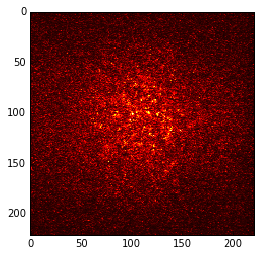

In [3]:
files=os.listdir()
TestImage = np.array(Image.open(files[5]))
plt.imshow(TestImage, cmap='hot', interpolation='nearest')
plt.show()

In [4]:
I=0
F=5
eCoeff = 0.01160
eOffset= 1917
Shape = 221
xvs = np.arange(0,Shape)
MeanFit = np.zeros(Shape**2).reshape((Shape,Shape))
eCoeffM = eCoeff*np.ones(Shape**2).reshape((Shape,Shape))
eOffsetM = eOffset*np.ones(Shape**2).reshape((Shape,Shape))
#TestImage = eCoeffM*(image - eOffsetM)
Im2=[]

for q in range(I,F):
    Images2 = eCoeffM*(np.array(Image.open(files[q]))- eOffsetM)
    MeanFit +=Images2
image = MeanFit/abs(F-I)
for x in range(0,Shape):
    coefs= poly.polyfit(xvs, image[x], 2) # fits 11th order poly 
    ffit = poly.polyval(xvs, coefs)
    hold = image[x]-(ffit)
    hold[hold < 0] = 0  # replaces negtive values form the sub with 0
    Im2.append(hold)
Im2=np.array(Im2)

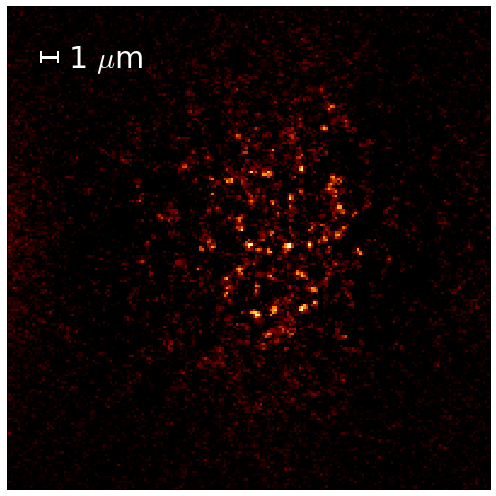

In [13]:
plt.figure(figsize=(7,7))

plt.imshow(Im2, cmap='afmhot', interpolation='nearest')
#plt.imshow(Imdat)
plt.xlim(0,200)
plt.ylim(0,200)
plt.plot([14,14+6.25],[179,179],linewidth=3,color='white')
plt.plot([14,14],[177,181],linewidth=2,color='white')
plt.plot([14+6.9,14+6.9],[177,181],linewidth=2,color='white')
plt.text(25,175,r'1 $\mu$m',rotation=0,fontsize=30,color='white')
plt.tick_params(labelbottom='off',labelleft='off')
plt.tight_layout()
#plt.savefig('/Users/austinmcdonald/Desktop/SingleBaPlots/2d-2spot5-Ba')

plt.show()